### import libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

### import dataset

In [2]:
data= pd.read_csv("/content/drive/MyDrive/DataFrames/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### data preprocessing

In [3]:
data.shape

(50000, 2)

In [4]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
data.duplicated().sum()

418

In [8]:
data.drop_duplicates(inplace= True)

In [9]:
data.dropna(inplace= True)

we'll take out the "< br />< br />" in data["reviews"]

In [10]:
data["review"]= data["review"].str.replace("<br /><br />", "")

we'll replace the upperr latters with lowercase letters

In [11]:
data['review'] = data['review'].str.lower()
data['review'] = data['review'].str.replace('[^a-zA-Z]', ' ')

<ipython-input-11-fc56ae5106b3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review'] = data['review'].str.replace('[^a-zA-Z]', ' ')


dataset after modification :

In [12]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic di...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i m going to have to disagree with the previou...,negative


In [13]:
data.describe(include= object)

,review,sentiment
count,49582,49582
unique,49580,2
top,this is yet another pseudo intellectual let s...,positive
freq,2,24884


### data visualization

In [14]:
data["sentiment"].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

<Axes: >

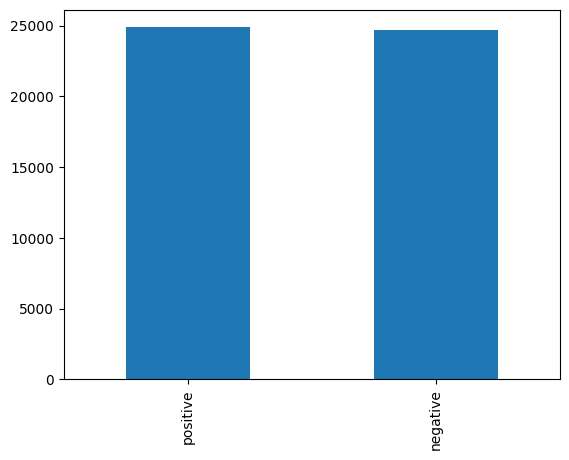

In [15]:
data["sentiment"].value_counts().plot.bar()

### data preprocessing

we'll represent each review as a vector of word counts

In [16]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['review'])

In [17]:
print(X)

  (0, 63171)	1
  (0, 62762)	7
  (0, 89443)	16
  (0, 63841)	2
  (0, 74605)	1
  (0, 39516)	1
  (0, 56483)	1
  (0, 89410)	4
  (0, 1409)	1
  (0, 97727)	2
  (0, 47388)	2
  (0, 64549)	6
  (0, 28805)	2
  (0, 100638)	3
  (0, 52137)	3
  (0, 7310)	2
  (0, 41687)	1
  (0, 89719)	1
  (0, 4219)	2
  (0, 75026)	2
  (0, 4683)	4
  (0, 89841)	3
  (0, 45656)	9
  (0, 29689)	1
  (0, 98364)	2
  :	:
  (49581, 50923)	1
  (49581, 44938)	1
  (49581, 30037)	1
  (49581, 5709)	1
  (49581, 39301)	1
  (49581, 60685)	1
  (49581, 43790)	1
  (49581, 43458)	1
  (49581, 30864)	1
  (49581, 4569)	1
  (49581, 61419)	1
  (49581, 91924)	1
  (49581, 48739)	1
  (49581, 83968)	1
  (49581, 55626)	1
  (49581, 73802)	1
  (49581, 28806)	1
  (49581, 12462)	1
  (49581, 14580)	1
  (49581, 30050)	1
  (49581, 36929)	1
  (49581, 73795)	1
  (49581, 59376)	1
  (49581, 19947)	1
  (49581, 100612)	1


then transform the labels to binary labels

In [18]:
y= data["sentiment"]

In [19]:
print(y)

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 49582, dtype: object


In [20]:
encoder= LabelEncoder()

In [21]:
encoder.fit(y)

LabelEncoder()

In [22]:
y_new= encoder.transform(y)

In [23]:
y_new

array([1, 1, 1, ..., 0, 0, 0])

so we have :


1.   Positive sentiment : 1
2.   Negative sentiment : 0



### data split

In [24]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.4, random_state= 0)

In [25]:
print(x_train.shape, y_train.shape)

(29749, 101377) (29749,)


In [26]:
print(x_test.shape, y_test.shape)

(19833, 101377) (19833,)


### create the moduls and train them

In [27]:
def evaluate(model, x_train, x_test, t_train, y_test) :
  model.fit(x_train, y_train)
  prediction= model.predict(x_test)

  accuracy= accuracy_score(y_test, prediction)
  evaluate_tab= pd.DataFrame([accuracy], columns= ["accuracy"])
  return evaluate_tab

#### logistic ragression

In [28]:
lr= LogisticRegression()

In [29]:
results = evaluate(lr, x_train, x_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
results.index= ["LogisticRegression"]

In [31]:
results

,accuracy
LogisticRegression,0.882872


#### KNeighborsClassifier

In [32]:
dtc= DecisionTreeClassifier()

In [33]:
dtc_results = evaluate(dtc, x_train, x_test, y_train, y_test)

In [34]:
results= pd.concat([results, dtc_results], ignore_index = True)

In [35]:
results.index= ["LogisticRegression", "DecisionTreeClassifier"]

In [36]:
results

,accuracy
LogisticRegression,0.882872
DecisionTreeClassifier,0.715373


#### RandomForestClassifier

In [38]:
rfc= RandomForestClassifier()

In [39]:
rfc_results = evaluate(rfc, x_train, x_test, y_train, y_test)

In [41]:
results= pd.concat([results, rfc_results], ignore_index = True)

In [42]:
results.index= ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier"]

In [43]:
results

,accuracy
LogisticRegression,0.882872
DecisionTreeClassifier,0.715373
RandomForestClassifier,0.845258


### conclusion

the best model to use for sentiment analysis of IMDB reviews is the logisticc regression model